# Evaluating Models

This notebook pulls in the model from the SpyPlane-RandomForestClassifier.ipynb notebook and evaluates the performance of our random forest classifier. Keep in mind that we have not yet looked into optimizing this model. 

This projects is based off the Buzzfeed news article on identifying spy planes found [here](https://www.buzzfeednews.com/article/peteraldhous/hidden-spy-planes), using the data and code adapted from their github repository [here](https://github.com/BuzzFeedNews/2017-08-spy-plane-finder).

## Instructions

Follow the directions in any cell that does not contain code. If a cell does contain code, run this before moving on to the next cell

In [1]:
%matplotlib inline
#import packages

#import packages for handling datasets and plotting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#sci-kit learn is a library with machine learning algorithms and methods for evaluating and running these
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Load Data and Train Model

Repeat the data formatting and model training steps from the previous notebook

In [2]:
# This relies on output from a previous notebook!
# If this cell does not work, try using the pregenerated data instead
#planes_labeled = pd.read_csv("/mnt/data/spyplane-data/pregenerated_planes_labeled.csv")
planes_labeled = pd.read_csv("/mnt/data/spyplane-data/planes_labeled.csv")

#format data by removing non-numeric columnns and factorize the class
X = planes_labeled.drop(['adshex','class', 'type'], axis = 1)
y = pd.factorize(planes_labeled['class'])[0]

#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#set a random seed so results will be the same for all of us
np.random.seed(415)

#traing model on training set
spy_model = RandomForestClassifier()
spy_model.fit(X_train,y_train)

#calculate predictions on test set
predictions = spy_model.predict(X_test)

---

# Metrics

We'll use the sci-kit learn metrics package to evaluate the model using various metrics. The documentation can be found [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

#### Accuracy

Accuracy measures the number of correct predictions divided by the total number of predictions. This method is not a good measure for cases in which the classes are imbalanced. 


In [3]:
metrics.accuracy_score(y_true = y_test, y_pred = predictions)

0.9318181818181818

#### Confusion Matrix

A confusion matrix is a summary of the prediction results for a classification problem. It will show the counts of how many correct and incorrect predictions were made for both the positive and negative classes. In this example the positive class is the surveillance plane class and the negative is the other, or normal, class.

In [4]:
#generate the confusion matrix and create a dataframe with it to help visualize the labels
cmtx = pd.DataFrame(
    metrics.confusion_matrix(y_test, predictions), 
    index=['actual:other', 'actual:surveillence'], 
    columns=['predicted:other', 'predicted:surveillence']
)

cmtx

,predicted:other,predicted:surveillence
actual:other,144,2
actual:surveillence,10,20


#### Area Under the Receiver Operating Characteristic Curve (ROC AUC)

The y_score can be either be probability estimates of the positive class, confidence values, or non-thresholded measure of decisions (as returned by “decision_function” on some classifiers). Here, we're using the probability estimates of the positive class.

In [5]:
#calculate y_score from the predicted probabilities of the positive (spy plane) class. 
y_score = spy_model.predict_proba(X_test)[:,1]
y_score

array([0.07, 0.13, 0.  , 0.01, 0.  , 0.  , 0.05, 0.61, 0.82, 0.01, 0.19,
       0.1 , 0.68, 0.25, 0.  , 0.08, 0.  , 0.63, 0.85, 0.01, 0.06, 0.05,
       0.02, 0.07, 0.05, 0.03, 0.34, 0.  , 0.  , 0.01, 0.18, 0.38, 0.  ,
       0.  , 0.  , 0.02, 0.06, 0.  , 0.03, 0.12, 0.96, 0.  , 0.  , 0.01,
       0.26, 0.  , 0.01, 0.49, 0.01, 0.  , 0.01, 0.  , 0.02, 0.  , 0.16,
       0.04, 0.02, 0.3 , 0.2 , 0.  , 0.06, 0.05, 0.03, 0.  , 0.08, 0.  ,
       0.1 , 0.  , 0.9 , 0.15, 0.89, 0.  , 0.01, 0.03, 0.  , 0.03, 0.  ,
       0.19, 0.  , 0.  , 0.02, 0.  , 0.04, 0.49, 0.01, 0.07, 0.36, 0.01,
       0.01, 0.92, 0.09, 0.92, 0.85, 0.01, 0.08, 0.16, 0.94, 0.02, 0.02,
       0.04, 0.  , 0.27, 0.9 , 0.09, 0.03, 0.09, 0.23, 0.01, 1.  , 0.01,
       0.93, 0.02, 0.68, 0.83, 0.81, 0.23, 0.  , 0.  , 0.  , 0.93, 0.1 ,
       0.02, 0.04, 0.  , 0.01, 0.  , 0.01, 0.05, 0.02, 0.02, 0.02, 0.  ,
       0.  , 0.  , 0.15, 0.01, 0.  , 0.75, 0.01, 0.  , 0.28, 0.09, 0.  ,
       0.  , 0.  , 0.02, 0.33, 0.01, 0.14, 0.01, 0.

In [6]:
#calulate false positive rate, true positive rate, and threshold
fpr, tpr, thresholds = metrics.roc_curve(y_true = y_test, y_score = y_score)

In [7]:
#calculate the roc_auc area
roc_auc = metrics.auc(fpr, tpr)

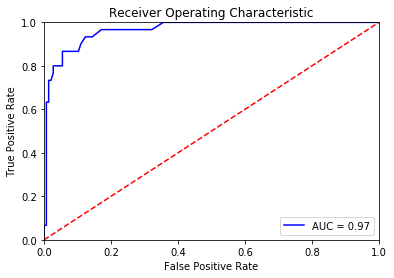

In [8]:
#plot the AUC-ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Precision Score

Precision shows how well our model correctly identified only the relevant surveillance plane data points. It is defined as the number of true positives divided by the sum of all of the _predicted_ positive values.

In [9]:
#calculate precision
metrics.precision_score(y_true = y_test, y_pred = predictions)

0.9090909090909091

#### Recall Score

Recall shows how well our model correctly identified all of the relevant surveillance plane data points. It is defined as the number of true positives divided by the sum of all of the _actual_ positive values.


In [10]:
#calculate recall
metrics.recall_score(y_true = y_test, y_pred = predictions)

0.6666666666666666

#### F1 Score

F1 score is the harmonic mean of precision and recall.

In [11]:
#calculate F1 score
metrics.f1_score(y_true = y_test, y_pred = predictions)

0.7692307692307692

# Activity

Consider yourself to be a journalist using these predictions to investigate surveillance planes. What factors would influence whether you try to opmitize precision vs recall? 